In [1]:
from qiskit import *
from qiskit.tools.visualization import plot_histogram, plot_bloch_multivector, plot_state_qsphere
import math
import cmath
import numpy as np
%matplotlib inline

In [2]:
qubits_alice = QuantumRegister(2, name='alice')
qubit_bob = QuantumRegister(1, name='bob')
classical = ClassicalRegister(1, name='classical')

qc = QuantumCircuit(qubits_alice, qubit_bob, classical)

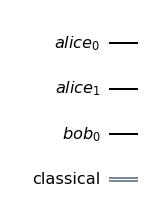

In [3]:
qc.draw('mpl')

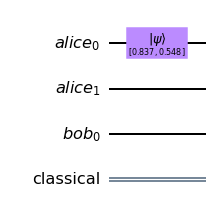

In [4]:
a = complex(math.sqrt(0.70),0)
b = complex(math.sqrt(0.30),0)
phi = np.array([a,b])
qc.initialize(phi,qubits_alice[0])

qc.draw('mpl')

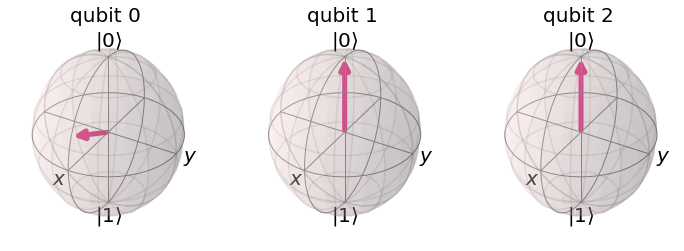

In [7]:
backend = Aer.get_backend('statevector_simulator')
state_vector = execute(qc, backend=backend).result().get_statevector()
plot_bloch_multivector(state_vector)

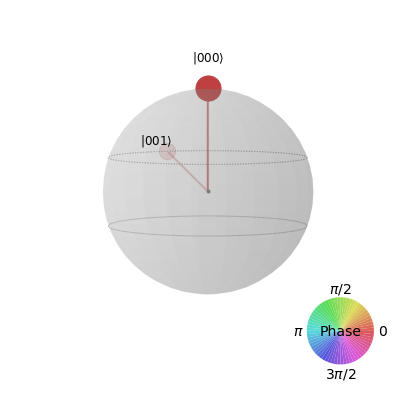

In [6]:
plot_state_qsphere(state_vector)

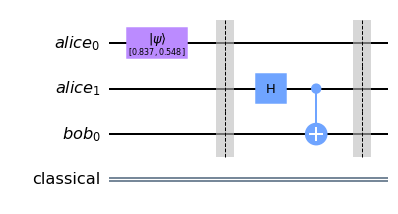

In [8]:
qc.barrier()
qc.h(qubits_alice[1])
qc.cx(qubits_alice[1],qubit_bob)
qc.barrier()
qc.draw('mpl')

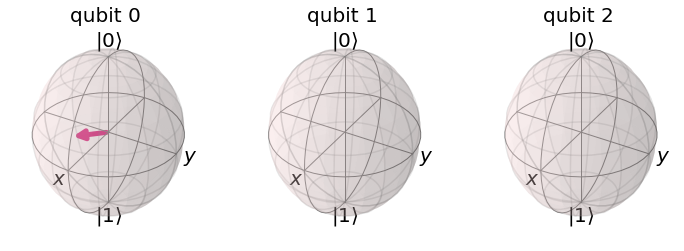

In [9]:
backend = Aer.get_backend('statevector_simulator')
state_vector = execute(qc, backend=backend).result().get_statevector()
plot_bloch_multivector(state_vector)

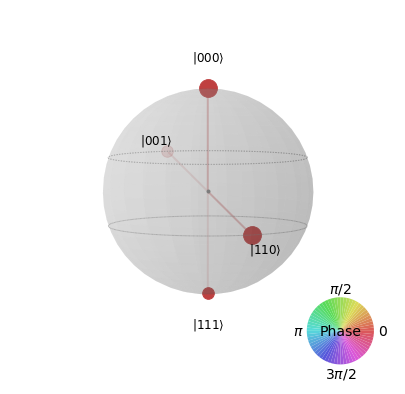

In [10]:
plot_state_qsphere(state_vector)

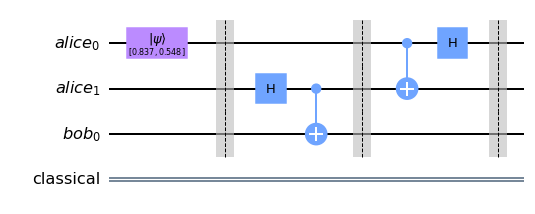

In [11]:
qc.cx(qubits_alice[0],qubits_alice[1])
qc.h(qubits_alice[0])
qc.barrier()
qc.draw('mpl')

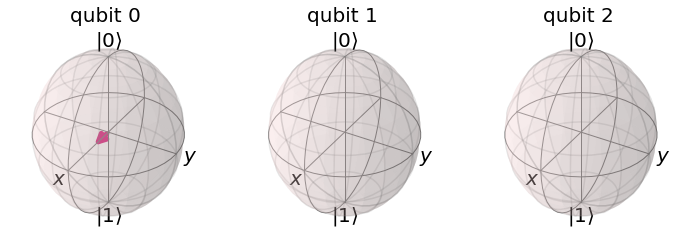

In [12]:
backend = Aer.get_backend('statevector_simulator')
state_vector = execute(qc, backend=backend).result().get_statevector()
plot_bloch_multivector(state_vector)

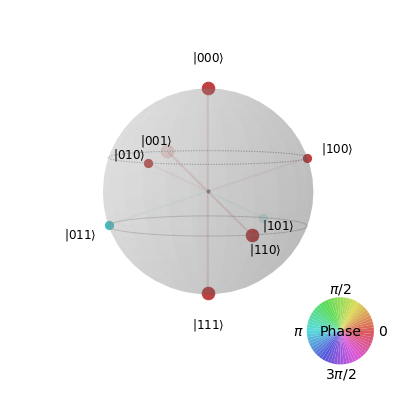

In [13]:
plot_state_qsphere(state_vector)

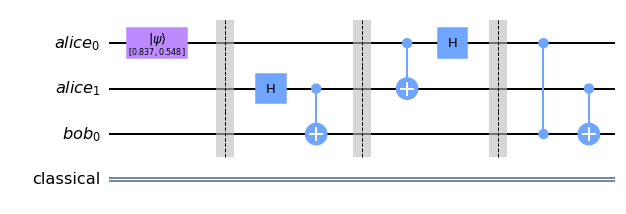

In [14]:
#qc.measure(qubits_alice[0],c1)
#qc.measure(qubits_alice[1],c2)
#qc.x(qubit_bob).c_if(c1,1)
#qc.z(qubit_bob).c_if(c2,1)
qc.cz(qubits_alice[0],qubit_bob)
qc.cx(qubits_alice[1],qubit_bob)
qc.draw('mpl')

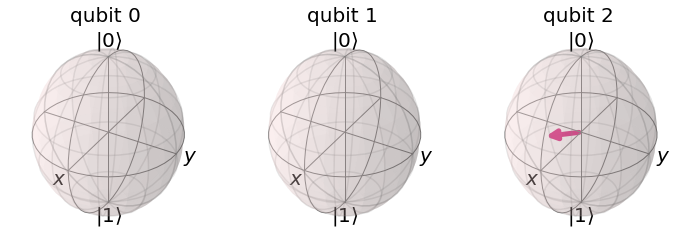

In [15]:
backend = Aer.get_backend('statevector_simulator')
state_vector = execute(qc, backend=backend).result().get_statevector()
plot_bloch_multivector(state_vector)

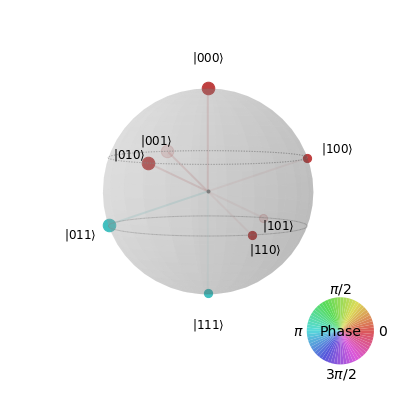

In [16]:
plot_state_qsphere(state_vector)

In [17]:
qc.barrier()
qc.measure(qubit_bob,classical)

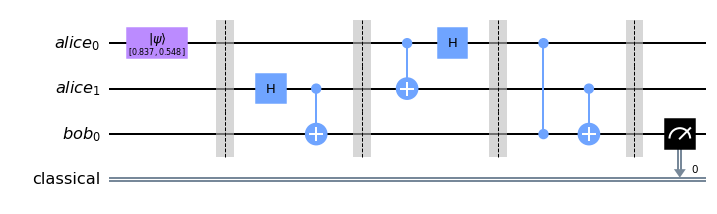

In [18]:
qc.draw('mpl')

In [19]:
qc = qc.reverse_bits()

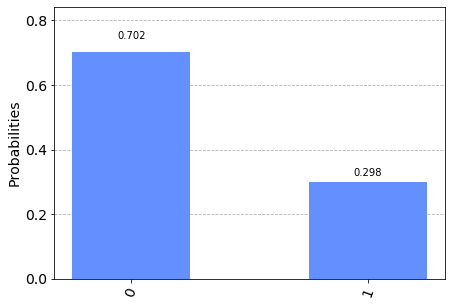

In [20]:
backend = Aer.get_backend('qasm_simulator')
results = execute(qc, backend = backend, shots = 8192).result()
counts = results.get_counts()
plot_histogram(counts)

In [21]:
IBMQ.load_account()

C:\Users\josev\anaconda3\lib\site-packages\qiskit\aqua\operators\operator_globals.py:48: DeprecationWarning: `from_label` is deprecated and will be removed no earlier than 3 months after the release date. Use Pauli(label) instead.
  X = make_immutable(PrimitiveOp(Pauli.from_label('X')))
C:\Users\josev\anaconda3\lib\site-packages\qiskit\providers\ibmq\ibmqfactory.py:192: UserWarning: Timestamps in IBMQ backend properties, jobs, and job results are all now in local time instead of UTC.
  warnings.warn('Timestamps in IBMQ backend properties, jobs, and job results '


<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

In [22]:
provider = IBMQ.get_provider('ibm-q')
qcomp = provider.get_backend('ibmq_santiago')

Job Status: job has successfully run


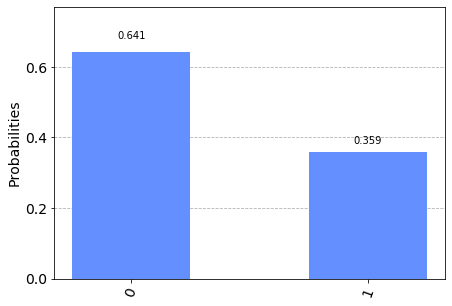

In [23]:
job = execute(qc, initial_layout=[2,3,4], backend = qcomp, shots = 8192)
from qiskit.tools.monitor import job_monitor
job_monitor(job)
results = job.result()
counts_santiago = results.get_counts()
plot_histogram(counts_santiago)

In [24]:
from qiskit.ignis.mitigation.measurement import (complete_meas_cal, CompleteMeasFitter)
cal_circuits, state_labels = complete_meas_cal(qr = 1, circlabel = 'measerrormitigationcal')

In [25]:
cal_job = execute(cal_circuits,initial_layout=[4],backend = qcomp, shots = 8192, optimization_level = 0)
print(cal_job.job_id())
from qiskit.tools.monitor import job_monitor
job_monitor(cal_job)
cal_results = cal_job.result()

60b83e929af47d22042d24c6
Job Status: job has successfully run


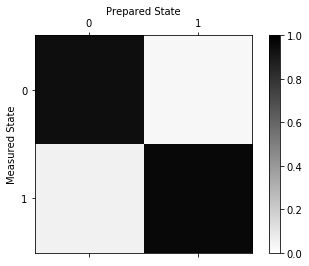

In [26]:
meas_fitter = CompleteMeasFitter(cal_results, state_labels)
meas_filter = meas_fitter.filter
meas_fitter.plot_calibration()

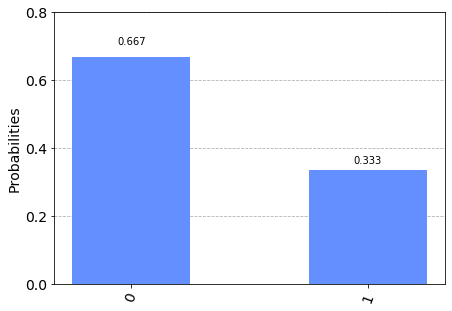

In [27]:
device_mitigated_counts = meas_filter.apply(counts_santiago)
plot_histogram(device_mitigated_counts)

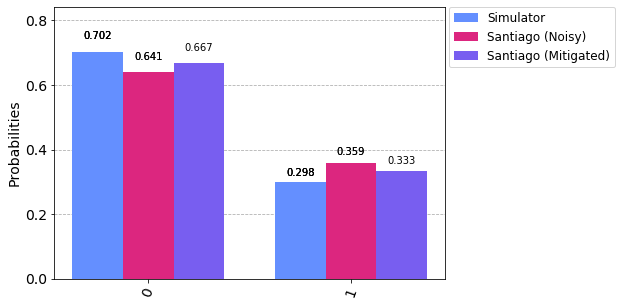

In [28]:
plot_histogram([counts, counts_santiago, device_mitigated_counts], legend = ['Simulator', 'Santiago (Noisy)', 'Santiago (Mitigated)'])